<a href="https://colab.research.google.com/github/Azad-Me/Default-Credit-Card-Classification/blob/main/Credit_Card_Defaulters_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


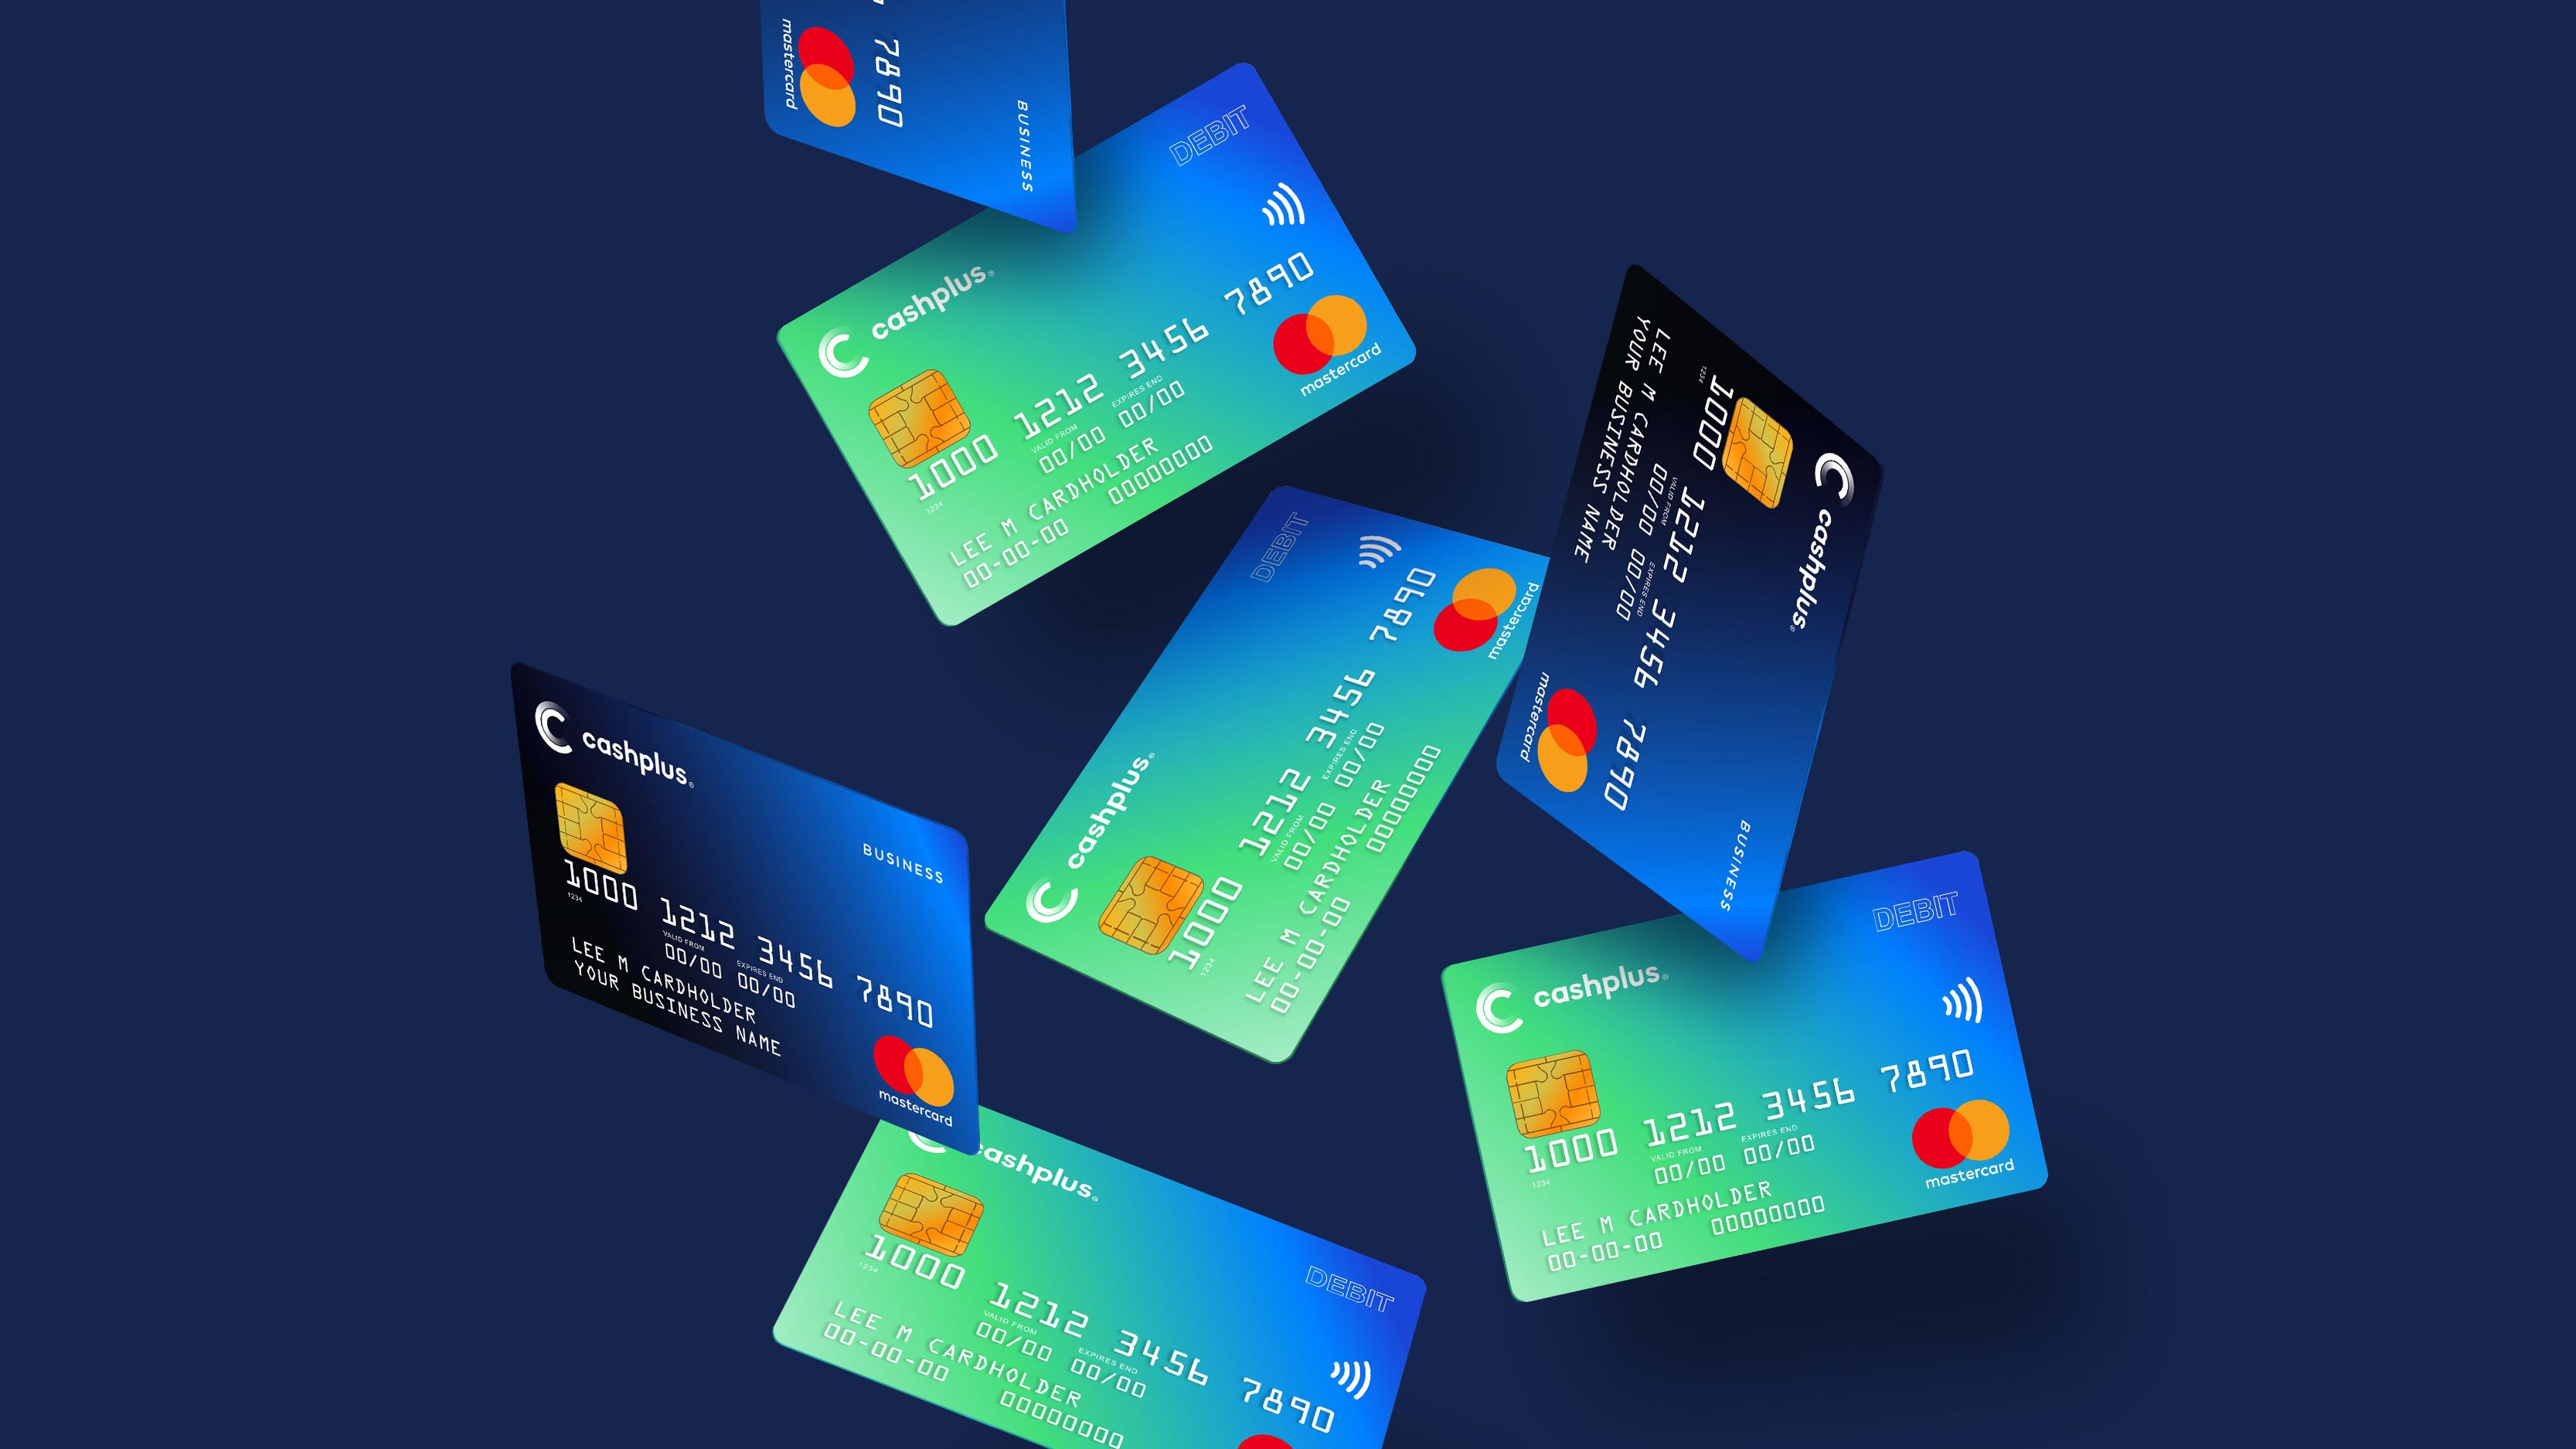

# **Project Summary -**

**A bank wanted to minimize their financial losses due to credit card defaults and decided to embark on a project to develop a machine learning model that could predict which customers were most likely to default on their payments.**

**The bank's team gathered a large amount of data on their customers, including credit ratings, transaction history, and demographic information.**\
 **They used this data to train a predictive model that would analyze a new customer's data and determine their likelihood of defaulting in the future.**

**The project involved several stages, including data preprocessing, exploratory data analysis, feature engineering, and model development. However, the team was able to develop a reliable predictive model that helped the bank reduce its financial losses significantly.**

**The machine learning model helped the bank identify high-risk customers early on and take proactive measures to prevent defaults. They could also provide better service to customers by tailoring credit offerings to their individual needs.**

**Overall, the Credit Card Default Prediction project was a success story for the bank. By using machine learning to solve a real-world problem, they were able to minimize financial losses and improve customer satisfaction. The bank was now better positioned to make informed credit decisions and offer better service to their customers.**

# **GitHub Link -**

https://github.com/Azad-Me/Default-Credit-Card-Classification

# **Problem Statement**


**How can banks and financial institutions accurately predict which customers are most likely to default on their credit card payments and take proactive measures to prevent defaults? Traditional methods have limitations and often fall short in predicting future defaults. The Credit Card Default Prediction project aims to address this issue by developing a machine learning model that analyzes customer transaction history, credit rating, demographic information, and other relevant factors to determine their likelihood of defaulting. The project's goal is to help financial institutions minimize their financial losses and improve customer satisfaction by identifying high-risk customers early on and preventing defaults before they occur.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
pip install --upgrade "kaleido==0.1.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.2 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as miss

from scipy.stats import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler
 
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import shap

In [ ]:
!pip install plotly.express
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
first_df=pd.read_csv('/content/drive/MyDrive/dat/Dataset/default of credit card clients.csv')

### Dataset First View

In [ ]:
# Dataset First Look
first_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('There are total',len(first_df['ID']),'Rows')
print('There are total',len(first_df.columns),'Columns')

There are total 30000 Rows
There are total 25 Columns


### Dataset Information

In [ ]:
# Dataset Info
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
('There are ',first_df.duplicated().sum(),'Duplicate columns.')

('There are ', 0, 'Duplicate columns.')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
first_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

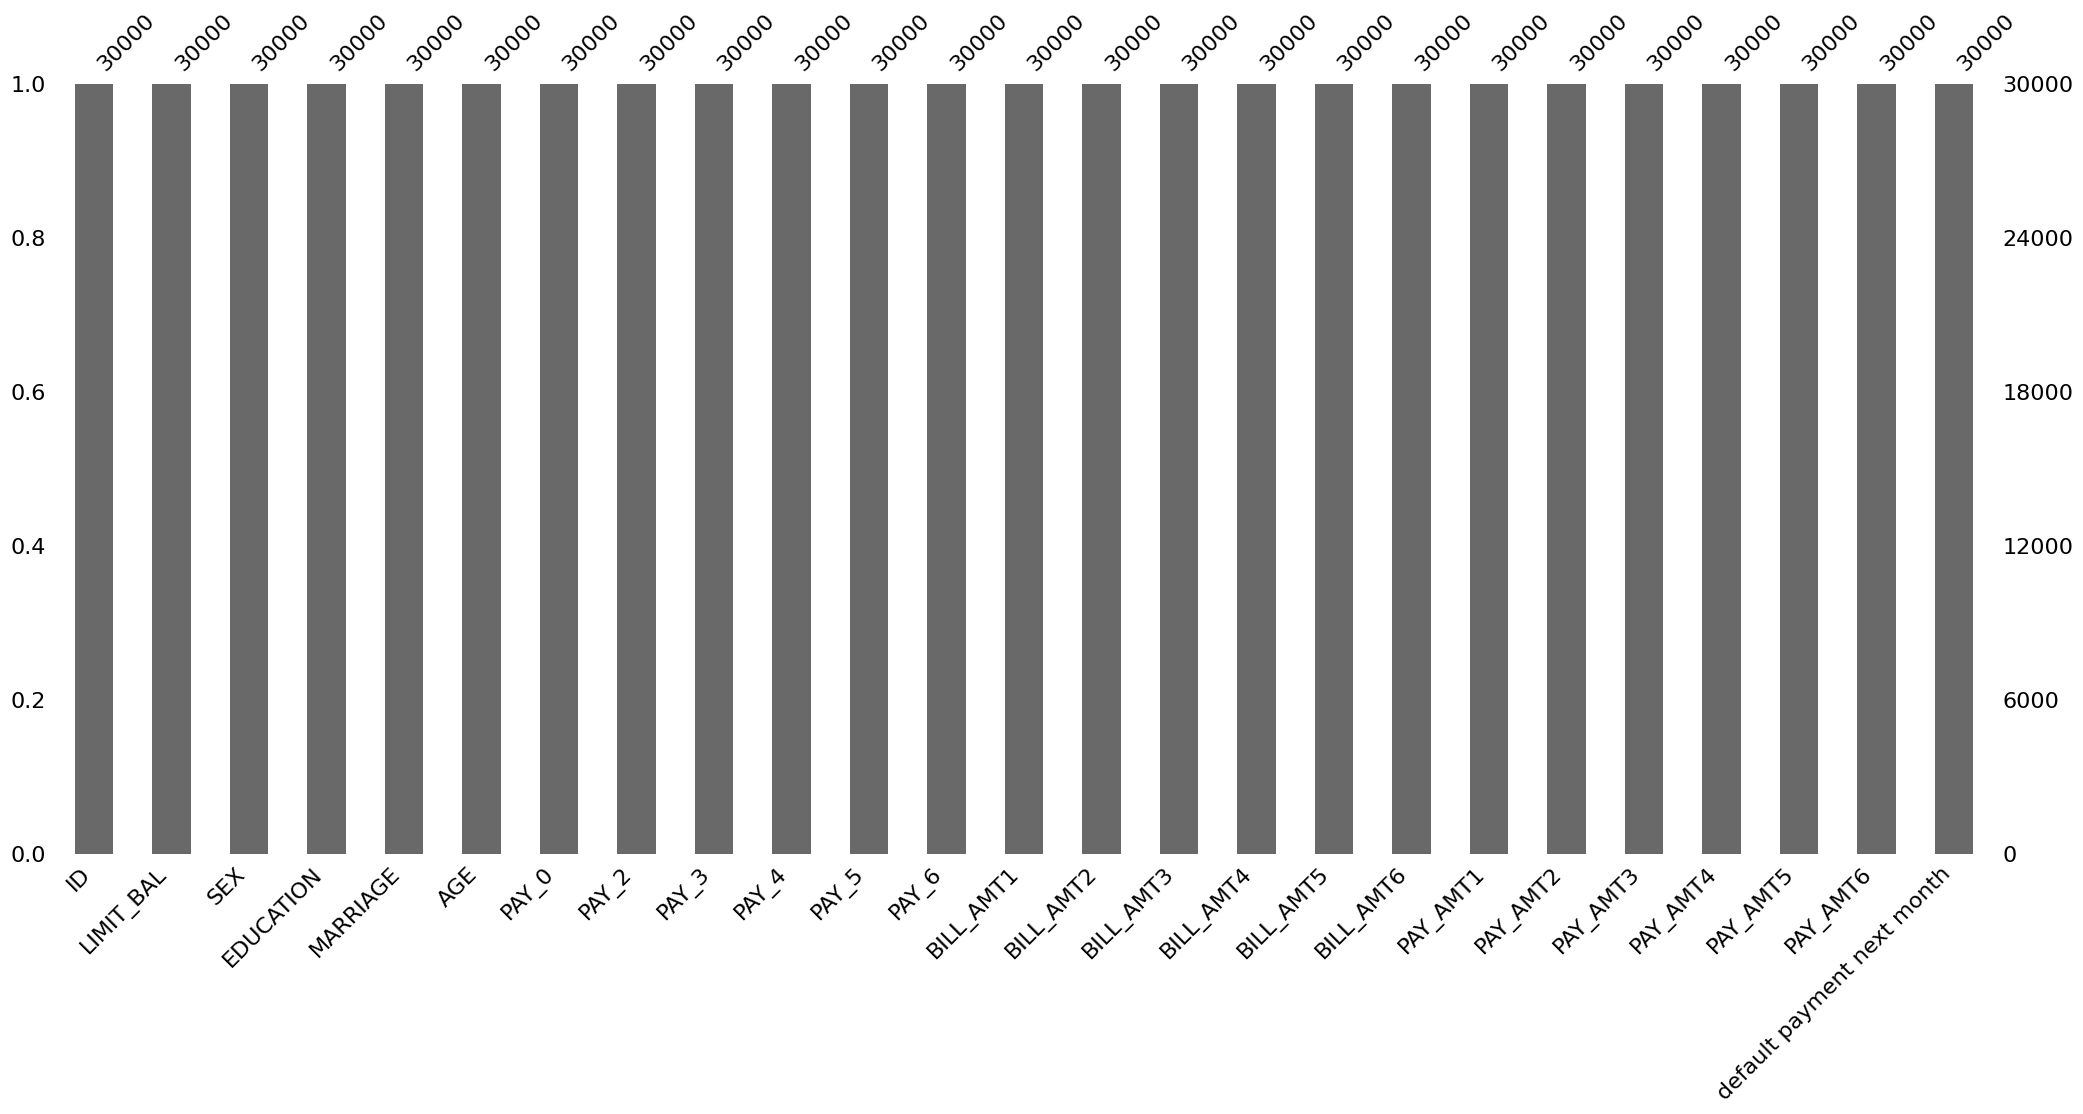

In [ ]:
# Visualizing the missing values
miss.bar(first_df)

### What did you know about your dataset?

First of all the dataset was an excel file I converted it into csv, manually in excel and then uploaded it to the Pandas.We can see there are no null values in any of the features and no duplicated values. By info function we know that some feautres are showing object type of data where as some are showing the float as well as integers.\


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
first_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
first_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description 

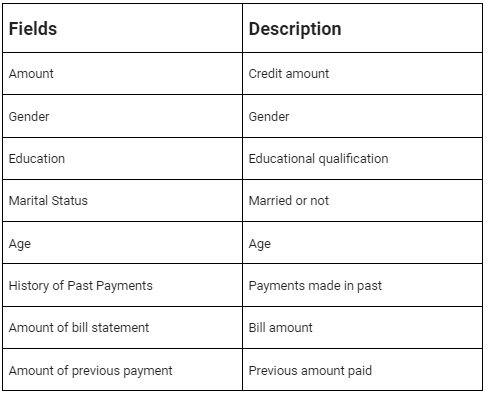

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)


BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

**I collected the above information from the internet as we require to process the values of features which were not been explained in problem statememt.**

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in first_df.columns:
  print(f' The unique values in the columns {i} is {first_df[i].nunique()} ')

 The unique values in the columns ID is 30000 
 The unique values in the columns LIMIT_BAL is 81 
 The unique values in the columns SEX is 2 
 The unique values in the columns EDUCATION is 7 
 The unique values in the columns MARRIAGE is 4 
 The unique values in the columns AGE is 56 
 The unique values in the columns PAY_0 is 11 
 The unique values in the columns PAY_2 is 11 
 The unique values in the columns PAY_3 is 11 
 The unique values in the columns PAY_4 is 11 
 The unique values in the columns PAY_5 is 10 
 The unique values in the columns PAY_6 is 10 
 The unique values in the columns BILL_AMT1 is 22723 
 The unique values in the columns BILL_AMT2 is 22346 
 The unique values in the columns BILL_AMT3 is 22026 
 The unique values in the columns BILL_AMT4 is 21548 
 The unique values in the columns BILL_AMT5 is 21010 
 The unique values in the columns BILL_AMT6 is 20604 
 The unique values in the columns PAY_AMT1 is 7943 
 The unique values in the columns PAY_AMT2 is 7899 
 The

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
first_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

**It seems the maximum value of 10 lakh might be the outlier, but we can also think that, one of the person can have that much amount in his account.But According to the results of describe function it seems that maximum amount would play as outlier**

In [ ]:
first_df['EDUCATION'].unique() # we can see the education have been mentioned as numbers, which would reqiure to change as strings

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
first_df['MARRIAGE'].unique()# we can see the MARRIAGE have been mentioned as numbers, which would reqiure to change as strings

array([1, 2, 3, 0])

**So in the above two codes the values are encoded with integers, so we require to assign the values to these integers.**\
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)\
Marital status (1 = married; 2 = single; 3 = others).

In [ ]:
second_df=first_df.copy()

In [ ]:
second_df.replace({'EDUCATION':{1:'graduate_school',2:'University',3:'High_school',4:'Others',5:'Others',6:'Others',0:'Others'},
                  'MARRIAGE':{1 : 'married', 2 : 'single', 3 : 'others',0:'others'},
                   'SEX':{1:'Male',2:'Female'}},inplace=True)

#### **WHat is the number of defaulters and non defaulters according to the education.**

In [ ]:
ed_default=second_df.groupby(['EDUCATION','default payment next month'])['ID'].count().reset_index()
ed_default.rename(columns={'ID': 'ID_counts'},inplace=True)

In [ ]:
ed_default

,EDUCATION,default payment next month,ID_counts
0,High_school,0,3680
1,High_school,1,1237
2,Others,0,435
3,Others,1,33
4,University,0,10700
5,University,1,3330
6,graduate_school,0,8549
7,graduate_school,1,2036


**So we can see, the university credit card holders have highest defaults,3330.**

#### **What is the count of defaulters according to the age group.**

In [ ]:
age_def=second_df.groupby(['AGE','default payment next month'])['ID'].count().reset_index()
age_def.rename(columns={'ID':'ID_counts'},inplace=True)

In [ ]:
age_def

,AGE,default payment next month,ID_counts
0,21,0,53
1,21,1,14
2,22,0,391
3,22,1,169
4,23,0,684
...,...,...,...
104,73,1,3
105,74,0,1
106,75,0,2
107,75,1,1


In [ ]:
age_def_1=age_def[age_def['default payment next month']== 1] 
age_def_1[age_def_1['ID_counts']==age_def_1['ID_counts'].max()]

,AGE,default payment next month,ID_counts
13,27,1,313
17,29,1,313


**So we have found our age group where maximum nuber of defaults have occured.**
> **The age group 27 and 29 have showed maximum number of defaults which are 313.**

#### **What is the frequency of different payment types.**
**-2 = No consumption,\
-1 = paid in full,\
0 = use of revolving credit (paid minimum only),\
1 = payment delay for one month,\
2 = payment delay for two months,\
.\
.\
.\
8 = payment delay for eight months,\
9 = payment delay for nine months and above**

In [ ]:
'''So we have known this fact that our features namely Pay_6, Pay_5 upto Pay_0 are the representations of months from April to September.
And the numeric values from -2 to 9 shows the respective payment type and its nature with respect to delay in payment.
For e.g 1 represent the delay in payment for one month , 2 for delay in two months, 9 for delay of payments for nine months.'''
# So we will analyse the nature of repayment for every month to analyse the presence of improvement!!

#Renaming the name of columns for better understanding
second_df.rename(columns={'PAY_0':'PAY_sep','PAY_2':'PAY_aug', 'PAY_3':'PAY_july', 'PAY_4':'PAY_june', 'PAY_5':'PAY_may', 'PAY_6':'PAY_april'},inplace=True)


In [ ]:
sep_df=second_df.groupby('PAY_sep')['ID'].count().reset_index().rename(columns={'ID':'sep_count'})

aug_df=second_df.groupby('PAY_aug')['ID'].count().reset_index().rename(columns={'ID':'aug_count'})

july_df=second_df.groupby('PAY_july')['ID'].count().reset_index().rename(columns={'ID':'july_count'})

june_df=second_df.groupby('PAY_june')['ID'].count().reset_index().rename(columns={'ID':'june_count'})

may_df=second_df.groupby('PAY_may')['ID'].count().reset_index().rename(columns={'ID':'may_count'})

april_df=second_df.groupby('PAY_april')['ID'].count().reset_index().rename(columns={'ID':'april_count'})


In [ ]:
repayment_df=pd.concat([sep_df,aug_df['aug_count'],july_df['july_count'],june_df['june_count'],may_df['may_count'],april_df['april_count']],axis=1)
repayment_df

,PAY_sep,sep_count,aug_count,july_count,june_count,may_count,april_count
0,-2,2759,3782,4085,4348,4546.0,4895.0
1,-1,5686,6050,5938,5687,5539.0,5740.0
2,0,14737,15730,15764,16455,16947.0,16286.0
3,1,3688,28,4,2,2626.0,2766.0
4,2,2667,3927,3819,3159,178.0,184.0
5,3,322,326,240,180,84.0,49.0
6,4,76,99,76,69,17.0,13.0
7,5,26,25,21,35,4.0,19.0
8,6,11,12,23,5,58.0,46.0
9,7,9,20,27,58,1.0,2.0


In [ ]:
unstack_df=pd.DataFrame(repayment_df.iloc[:,1:],index=repayment_df['PAY_sep']).unstack()
unstack_df=unstack_df.reset_index().rename(columns={0:'values','PAY_sep':'repay_score','level_0':'repayment_months'})
unstack_df

,repayment_months,repay_score,values
0,sep_count,-2,NaN
1,sep_count,-1,NaN
2,sep_count,0,2759.0
3,sep_count,1,5686.0
4,sep_count,2,14737.0
...,...,...,...
61,april_count,4,184.0
62,april_count,5,49.0
63,april_count,6,13.0
64,april_count,7,19.0


### What all manipulations have you done and insights you found?

From the manipulations I have found that the frequency for payment defaults is maximum for university people.\
The age group which involved in maximum number of defaults is 27 and 29.\
There were some features which were not in there proper format. for e.g marriage. It was required to change in the form of a categorical feature(married , unmarried and others).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

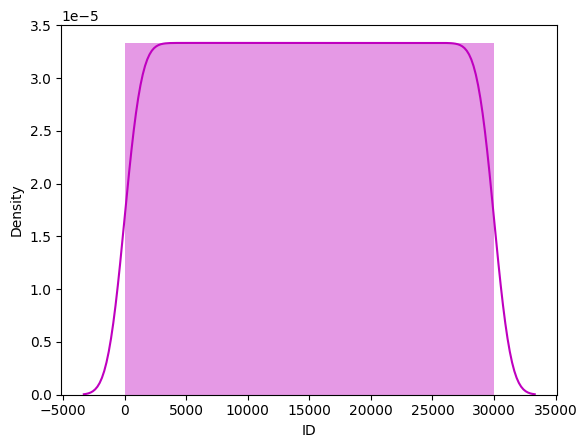

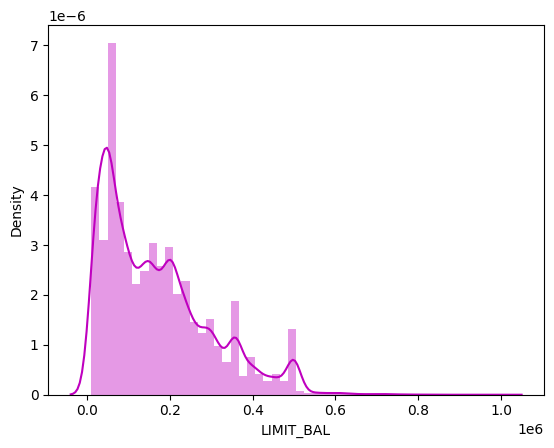

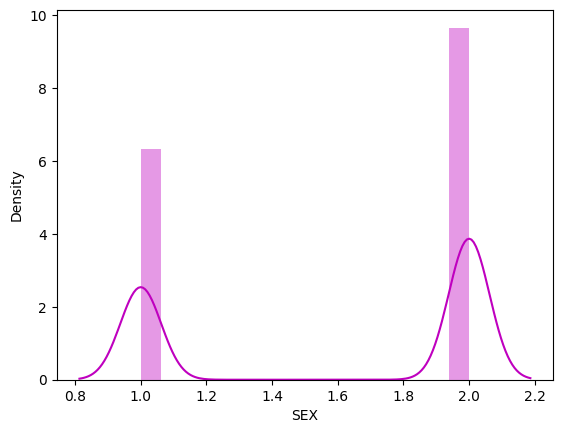

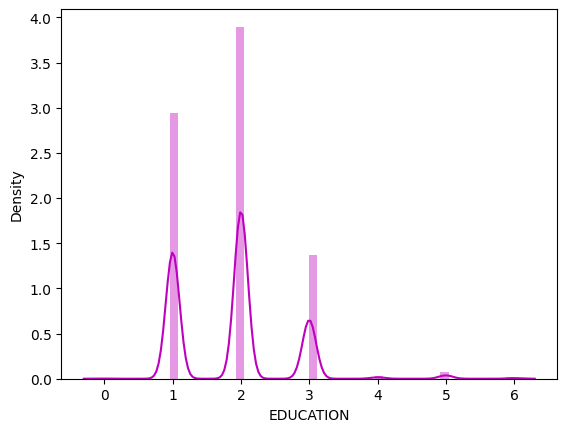

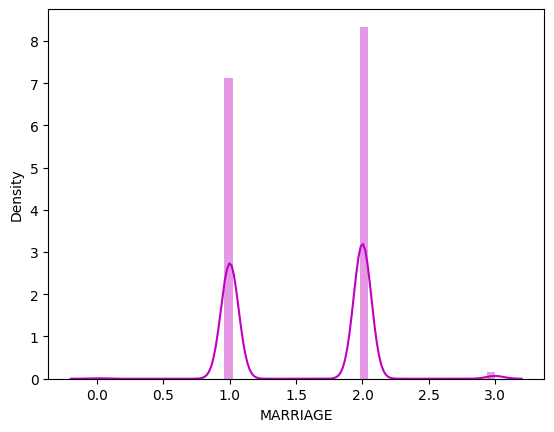

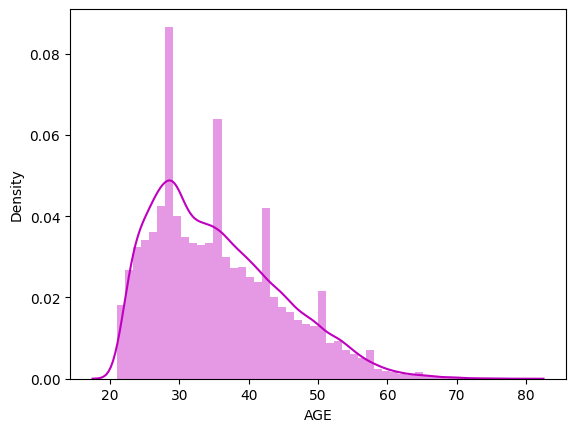

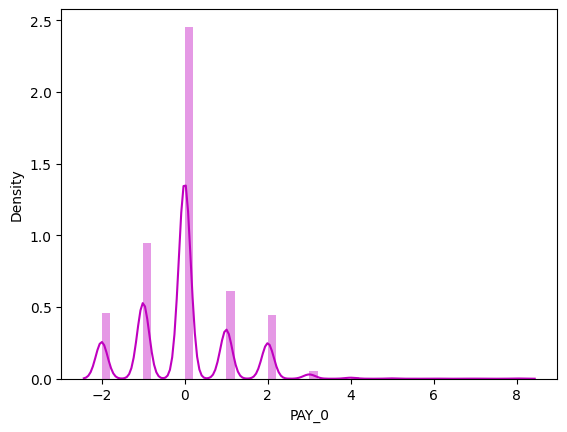

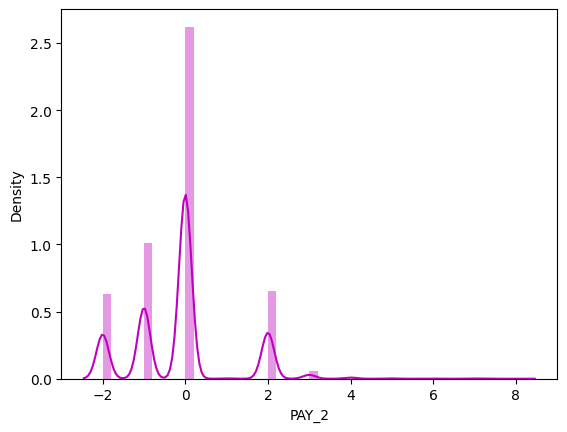

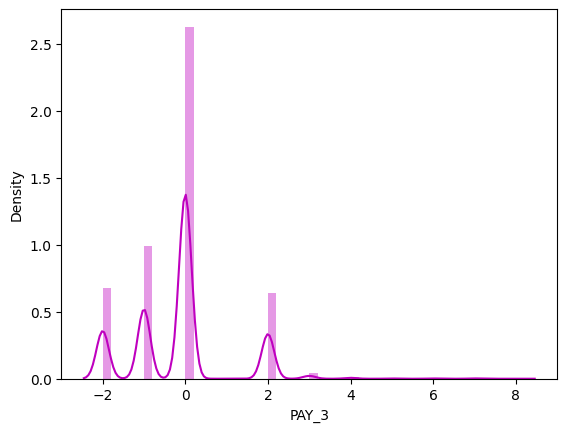

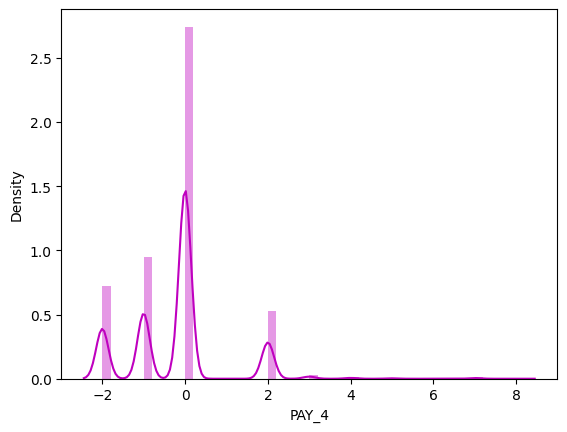

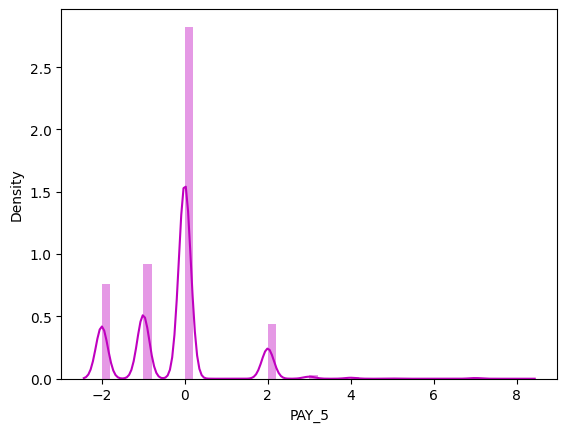

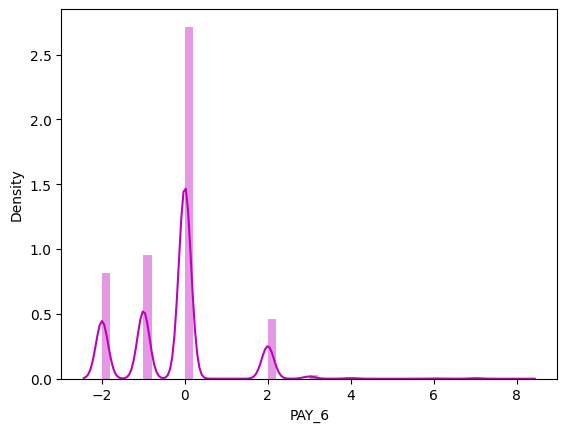

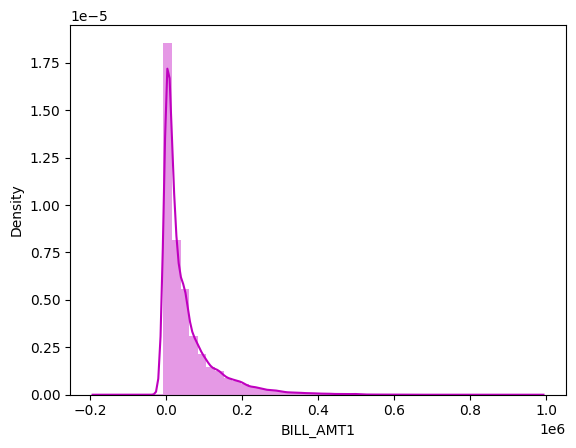

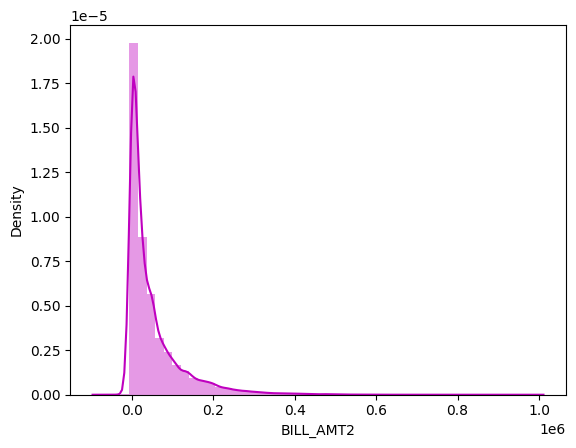

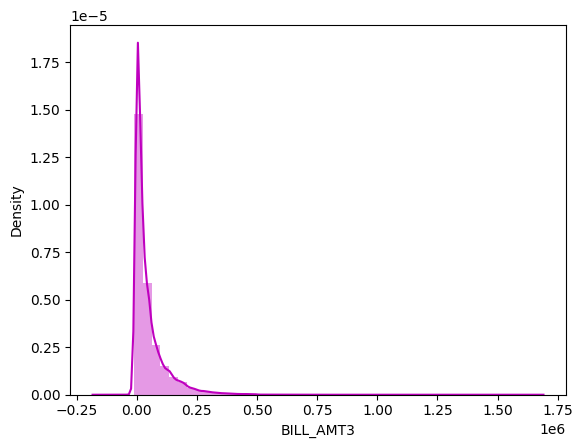

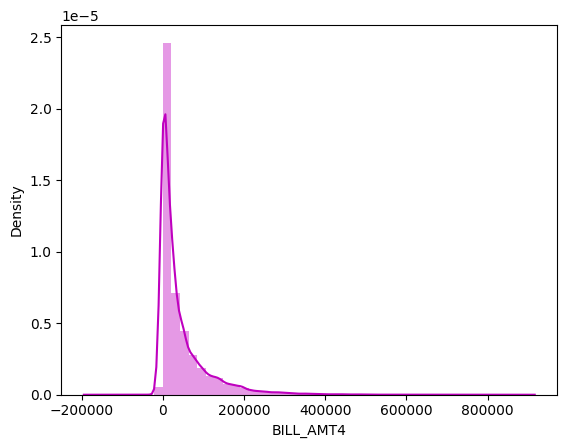

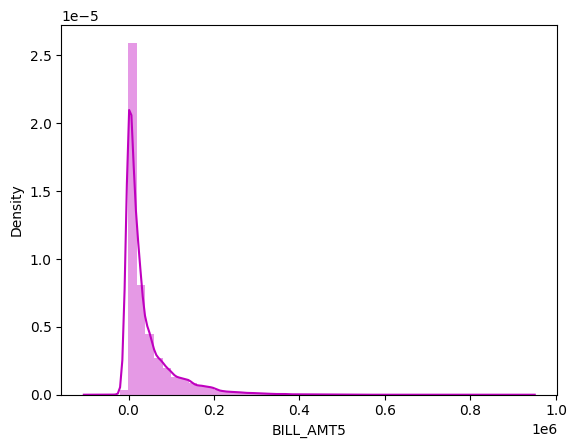

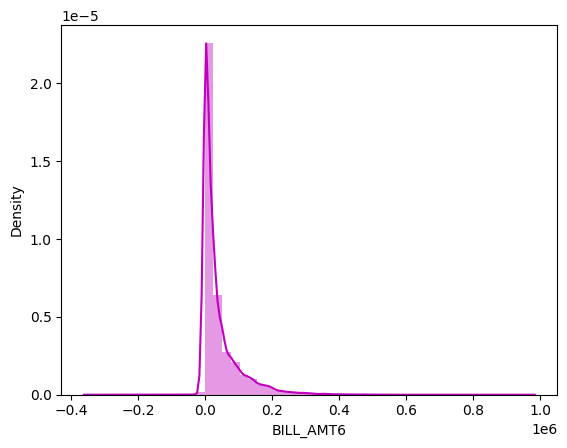

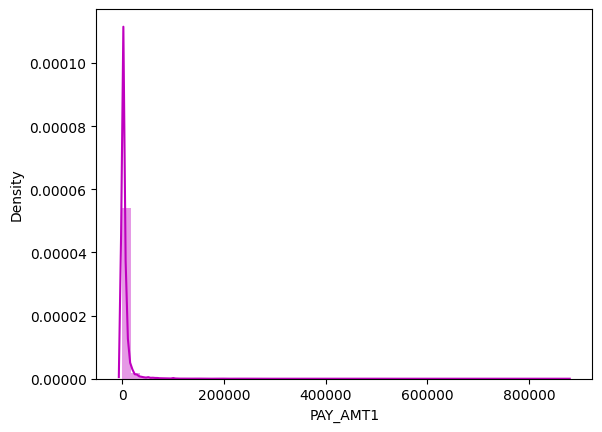

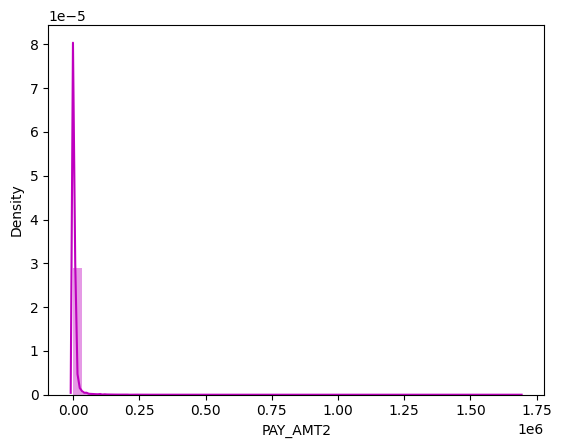

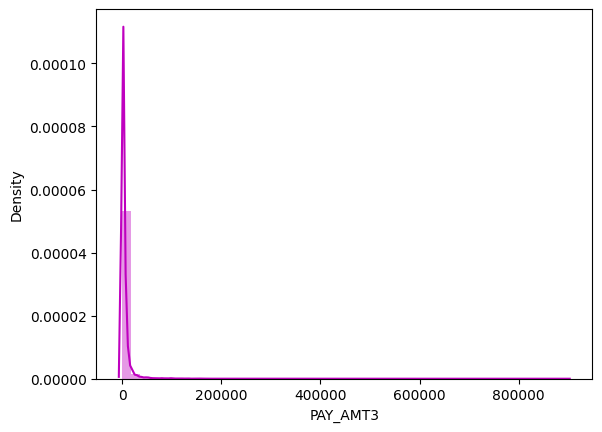

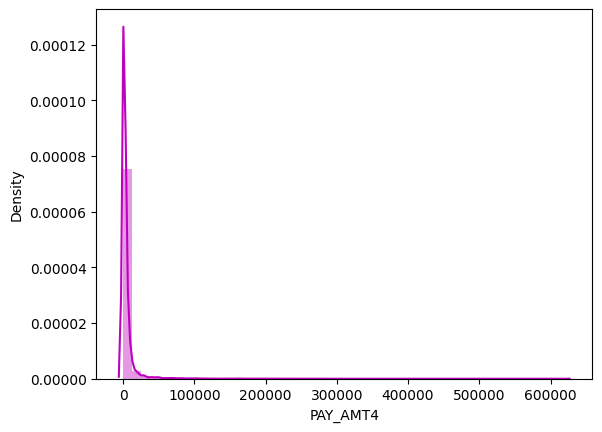

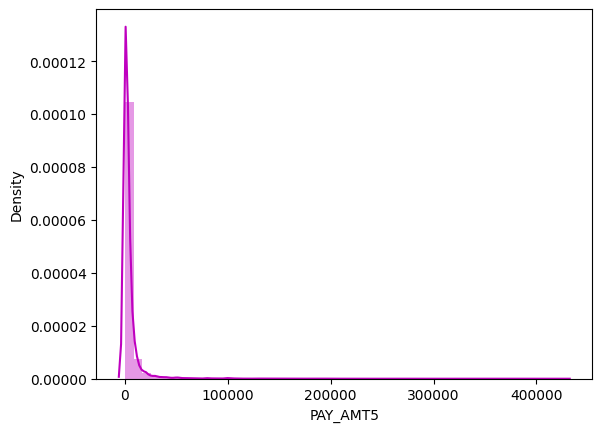

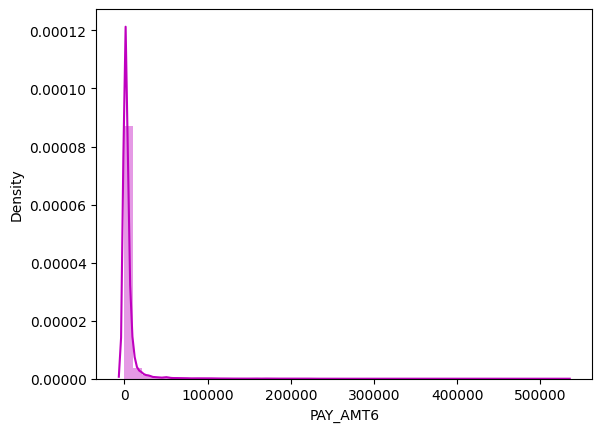

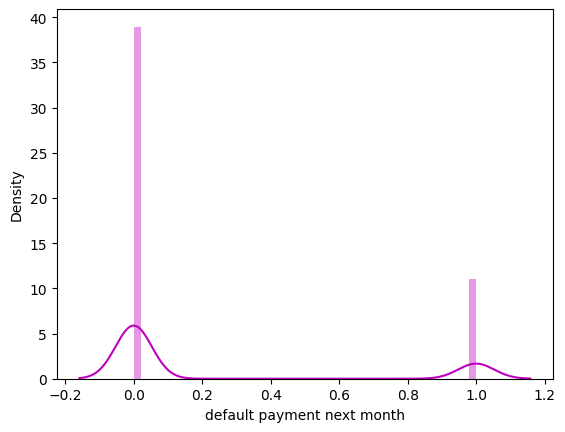

In [ ]:
# Chart - 1 visualization code
for i in first_df.columns:
  sns.distplot(first_df[i],color='m')
  plt.show()

**Seaborn's Distribution Plot is the most useful plot when we require to understand the skewedness of datapoints concerned with the features.**\
**It shows not even a single feature has normal type of distribution.Every other feature is skewed.We will treat this skewedness further in the project under the heading of transformation.**

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
ed_default

,EDUCATION,default payment next month,ID_counts
0,High_school,0,3680
1,High_school,1,1237
2,Others,0,435
3,Others,1,33
4,University,0,10700
5,University,1,3330
6,graduate_school,0,8549
7,graduate_school,1,2036


In [ ]:
import plotly.graph_objects as go

In [ ]:
bars=list(set([i for i in ed_default['EDUCATION']]))
bars

['Others', 'University', 'High_school', 'graduate_school']

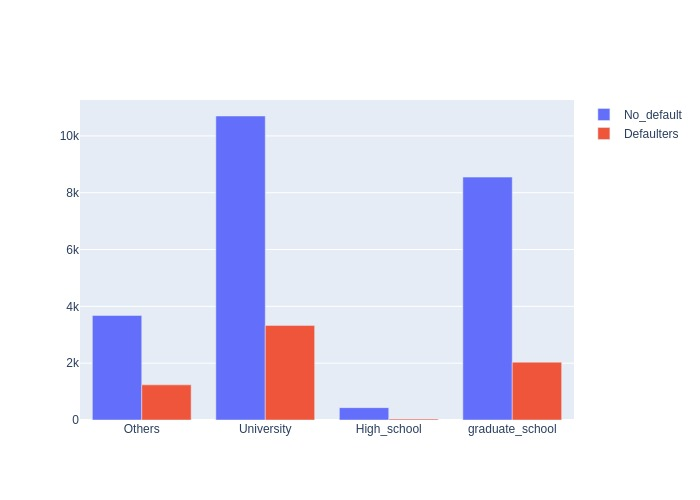

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='No_default', x=bars, y=[3680,10700,435,8549]),
    go.Bar(name='Defaulters', x=bars, y=[1237,3330,33,2036])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show('jpg')

**The graph shows University people have been involved in defaulting most number of times.**\
**We can understand that Banks can always be cautious, while providing the credit  cards to the university people.**\
**Even if bank have provoded the credit cards to the university people in particular and any risk inflicted people in general, Banks can easily watch the health of these specific customers.**

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
age_def

,AGE,default payment next month,ID_counts
0,21,0,53
1,21,1,14
2,22,0,391
3,22,1,169
4,23,0,684
...,...,...,...
104,73,1,3
105,74,0,1
106,75,0,2
107,75,1,1


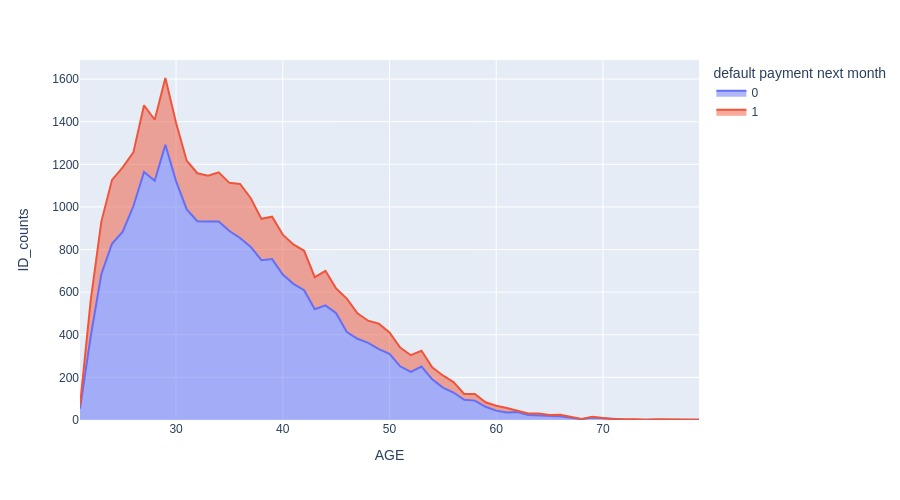

In [ ]:
fig=px.area(age_def , x='AGE',y='ID_counts',color='default payment next month',hover_name='ID_counts')
fig.update_layout(width=900,height=500)
fig.show('jpg')

**THe Graph is showing the age group which have been involved in maximum nuber of defaults.**\
**The age group of 27 and 29 is showing maximum number of defaults from all the defaults.**\
**But the another fascinating information we can extract from here is, the age group with maximum nuber of non defaults also lies on 27 to 30**

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
unstack_df

,repayment_months,repay_score,values
0,sep_count,-2,NaN
1,sep_count,-1,NaN
2,sep_count,0,2759.0
3,sep_count,1,5686.0
4,sep_count,2,14737.0
...,...,...,...
61,april_count,4,184.0
62,april_count,5,49.0
63,april_count,6,13.0
64,april_count,7,19.0


<Axes: xlabel='repay_score', ylabel='values'>

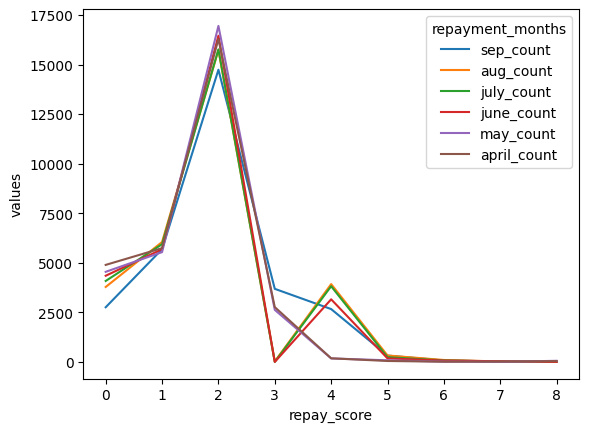

In [ ]:
sns.lineplot(unstack_df,x='repay_score',y='values',hue='repayment_months')

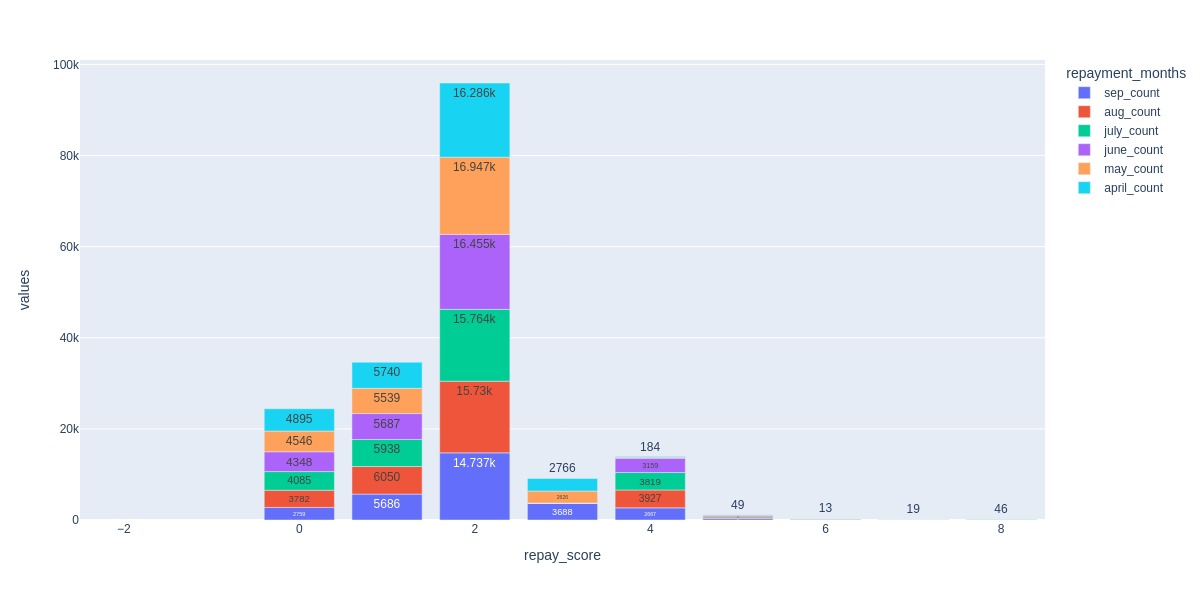

In [ ]:
fig = px.bar(unstack_df,x='repay_score',y='values',color='repayment_months',text_auto = True)
fig.update_layout(width=1200,height=600)
fig.show('jpg')

**We can see maximum number of people have delayed their repayments for two months.There are very negligible number of people delayed the repayment for more than 4 months.**

#### Chart - 5

In [ ]:
first_df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Chart - 5 visualization code
limit_bal= first_df['LIMIT_BAL'].value_counts().reset_index().rename(columns={'index':'Payment'})
limit_bal1=limit_bal.sort_values(by='Payment')
limit_bal1

,Payment,LIMIT_BAL
24,10000,493
74,16000,2
1,20000,1976
2,30000,1610
34,40000,230
...,...,...
66,750000,4
79,760000,1
75,780000,2
73,800000,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '10000'),
  Text(1, 0, '16000'),
  Text(2, 0, '20000'),
  Text(3, 0, '30000'),
  Text(4, 0, '40000'),
  Text(5, 0, '50000'),
  Text(6, 0, '60000'),
  Text(7, 0, '70000'),
  Text(8, 0, '80000'),
  Text(9, 0, '90000'),
  Text(10, 0, '100000'),
  Text(11, 0, '110000'),
  Text(12, 0, '120000'),
  Text(13, 0, '130000'),
  Text(14, 0, '140000')])

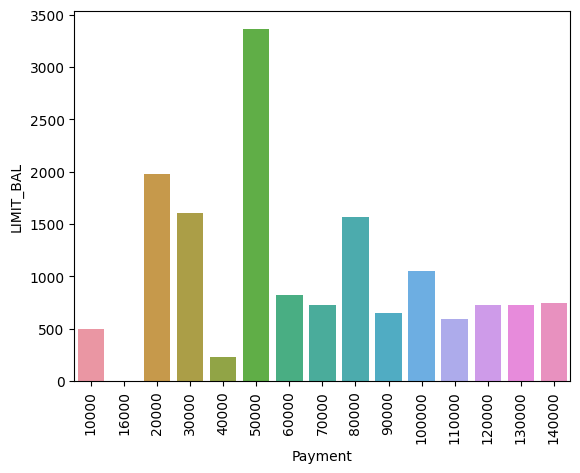

In [ ]:
sns.barplot(limit_bal1[:15],x='Payment',y='LIMIT_BAL')
plt.xticks(rotation = 90)


**We can see the most frequent amount in the bank accounts of people is 50000.Now if we see which amount category shows the maximum number of defaults we could understand and could able to create a basic limit for issuing the credit cards.**

#### Chart - 6

In [ ]:
default= first_df[first_df['default payment next month']==1]


In [ ]:
# Chart - 6 visualization code
default1=first_df.groupby('LIMIT_BAL')['default payment next month'].value_counts()
default1=pd.DataFrame(default1)
default12=default1.rename(columns={'default payment next month':'Default'}).reset_index()
default12.head()

,LIMIT_BAL,default payment next month,Default
0,10000,0,296
1,10000,1,197
2,16000,0,2
3,20000,0,1278
4,20000,1,698


In [ ]:
fig = px.histogram(default12, x="LIMIT_BAL", y="Default",
             color='default payment next month', barmode='group',nbins=20,
             histfunc='avg',
             width=1000,text_auto=True)
fig.show()

**From above graph we can see by hovering the mouse , the balance group 50K to 90 K shows maximum number of deposits. It shows a second highest number of defaults where as the lowest group of balance upto 40K shows highest defaults.**

#### Chart - 7 - Correlation Heatmap

<Axes: >

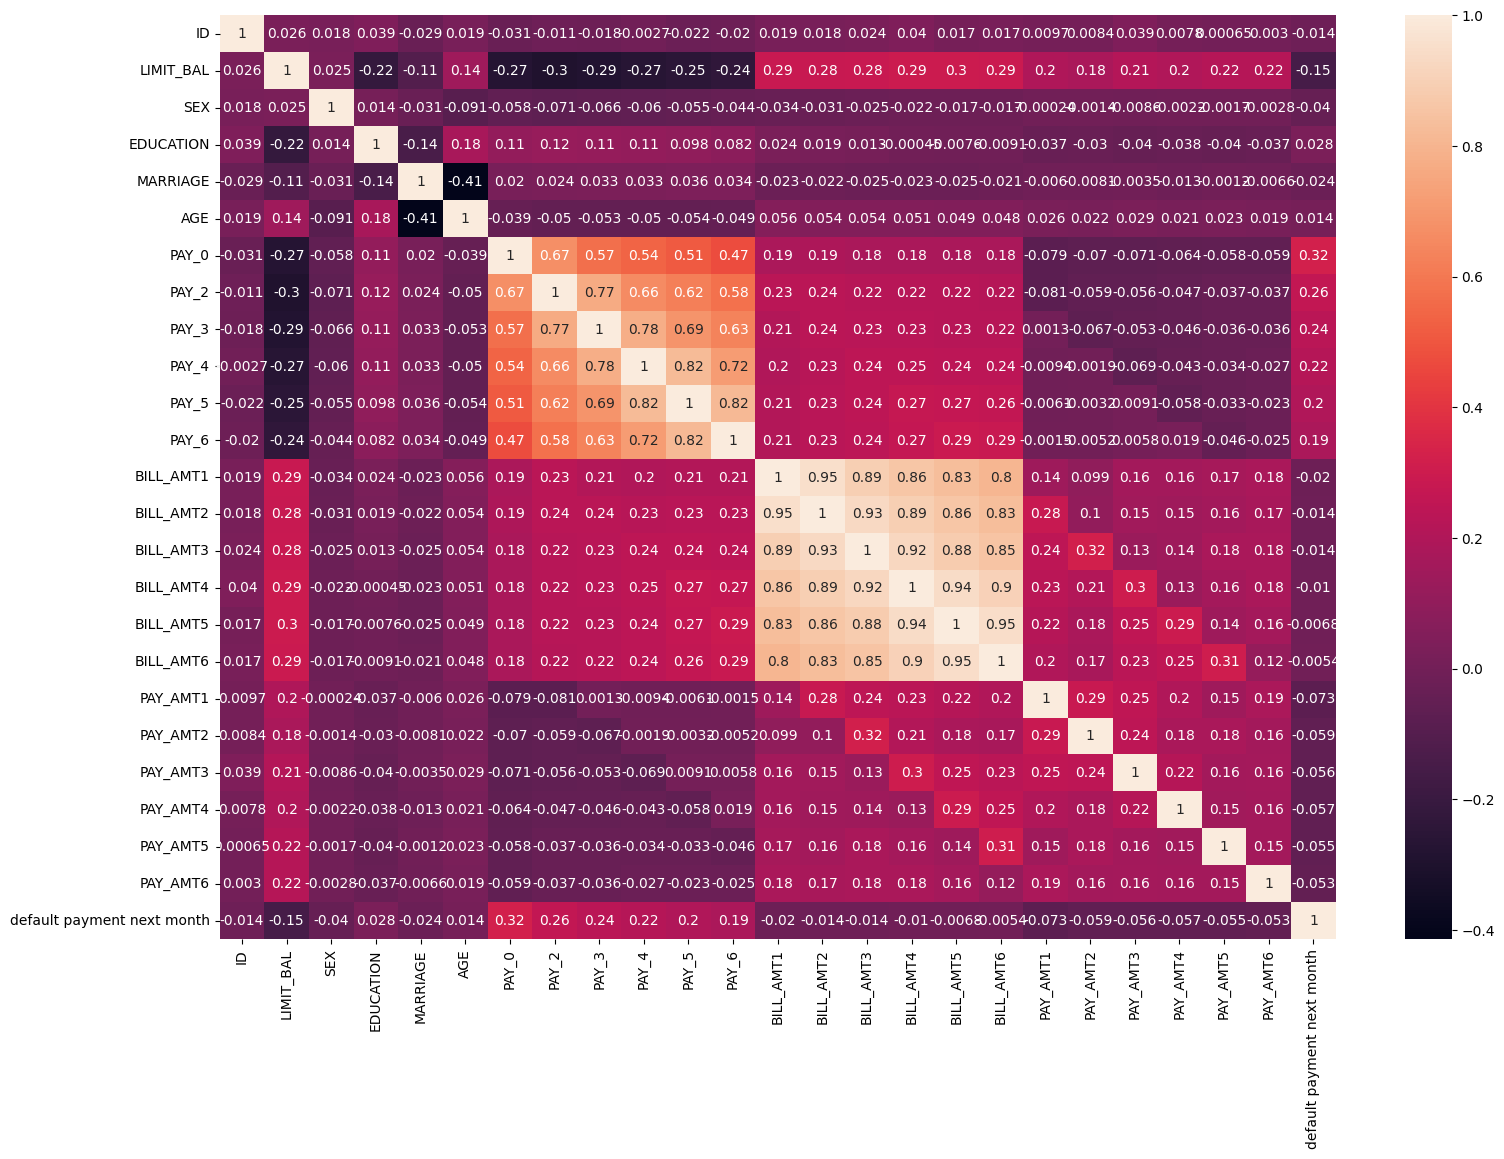

In [ ]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(18, 12))
corr=first_df.corr()
sns.heatmap(corr,annot=True)

**We can see the multicolinearity in features related to the repayment status and last month balance. We can expect such kind of multicolinearity. The features are closely related. We can say there is just one feature which is observed for 6 months.**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Suppose we want to test whether there is a difference in the default payment rates between male and female credit card users. You could divide a sample of credit card users into two groups:**

**Group A:  Which consists of male credit card users.**\
**Group B:  Which consists of female credit card users.**

**The Null Hypothesis: The null hypothesis is that there is no difference in default payment rates between male and female credit card users.**

**The Alternative Hypothesis: The alternative hypothesis is that there is a difference in default payment rates between male and female credit card users.**



In [ ]:
'''first assigning the Random group of males and females'''

male_df = second_df[second_df['SEX']=='Male'].sample(5000)  # This DF only contains the Random values of male users.
female_df = second_df[second_df['SEX']== 'Female'].sample(5000)  # This DF only contains the Random values of female users

I am using the two sample t-test for compairing the difference between the rate of default payments in both the groups.\
First I am taking the random sample of 5000 datapoints for each groups.\
Then, seggregating and calculating the percentage of defaults in each group.\
> percentage = total defaults/ total datapoints of group * 100

Later on, for calculating the two sample t-test we require to calculate the standard deviation for both the random sample groups.
> the final t score = ( R1 - R2 )/SE \
where\
R1 - Rate of first group\
R2 - Rate of second group\
SE - Standard Error of diffrences of rate

again,

SE = sqrt[(s1^2 /n1) + (s2^2 /n2)]

Finally, Calculating the P-Value and assigning the significance to the Hypothesis.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
'''Seggregating the default and non default values and finding the percentage.'''
print('Male default values',male_df[ 'default payment next month'].value_counts())
print('Female default values',female_df[ 'default payment next month'].value_counts())

print('-'*50)

'''Calculting the rate of male and female group'''

male_rate= len(male_df[male_df[ 'default payment next month']== 1])/5000 *100
female_rate = len(female_df[female_df['default payment next month']==1])/5000 *100
print('The rate of payment default for male group is',male_rate)
print('The rate of payment default for female group is',female_rate)

print('-'*50)

print('Calculating the Standard error of differences in their rate.')
sample_size= 5000

SE = np.sqrt((male_df['default payment next month'].std()**2/sample_size) + (female_df['default payment next month'].std()**2/sample_size))
print(' ')
print('The value for standard error is ',SE)

print('-'*50)

print('Calculating the two sample t-score')
print(' ')

t_score= (male_rate - female_rate)/SE
print('The value for two sampled t-score is ',t_score)
print('-'*50)

print('Calculation of P_value')

dof = sample_size-2
P_value = t.cdf(t_score , dof)
print(' ')
print('The final P_value is',P_value)

Male default values 0    3782
1    1218
Name: default payment next month, dtype: int64
Female default values 0    3954
1    1046
Name: default payment next month, dtype: int64
--------------------------------------------------
The rate of payment default for male group is 24.36
The rate of payment default for female group is 20.919999999999998
--------------------------------------------------
Calculating the Standard error of differences in their rate.
 
The value for standard error is  0.008363783269197907
--------------------------------------------------
Calculating the two sample t-score
 
The value for two sampled t-score is  411.2971234762639
--------------------------------------------------
Calculation of P_value
 
The final P_value is 1.0


In [ ]:
# Finally Making the assumptions

if P_value > 0.05:
  print('As the P_value is greater than the significance value, Null Hypothesis can not be rejected')
else:
  print('As the P_value is lower than the significance value, The Null Hypothesis can be rejected')

As the P_value is greater than the significance value, Null Hypothesis can not be rejected


**As we can see the results of two sampled t-test is are positive.**\
**From the results we can conclude that Statistically there is no significant difference between the default rates of Males and Females.**\
**While doing in the banks or any financial institutes, we can conclude that statistically both males and females have the same probability of making the defaults.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
first_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**There are zero outliers.**

### 2. Handling Outliers

In [ ]:
third_df=first_df.copy()

In [ ]:
# Handling Outliers & Outlier treatments

for i in third_df.columns:
  if i != 'default payment next month':
    sort = first_df[i].sort_values()
    Q1 = np.percentile(sort , 25 , interpolation='midpoint')
    
    Q3 = np.percentile(sort , 75 , interpolation='midpoint')

    IQR = Q3 - Q1
    
    Lower_limit = Q1 - (1.5 * IQR)
    Upper_limit = Q3 + (1.5 * IQR)
    
    for j in first_df[i]:
      if ((j > Upper_limit) or (j < Lower_limit)) :
        third_df[i].replace( j , np.nan,inplace = True)

In [ ]:
third_df.isnull().sum()

ID                               0
LIMIT_BAL                      167
SEX                              0
EDUCATION                      454
MARRIAGE                         0
AGE                            272
PAY_0                         3130
PAY_2                         4410
PAY_3                         4209
PAY_4                         3508
PAY_5                         2968
PAY_6                         3079
BILL_AMT1                     2400
BILL_AMT2                     2395
BILL_AMT3                     2469
BILL_AMT4                     2622
BILL_AMT5                     2725
BILL_AMT6                     2693
PAY_AMT1                      2745
PAY_AMT2                      2714
PAY_AMT3                      2598
PAY_AMT4                      2994
PAY_AMT5                      2944
PAY_AMT6                      2958
default payment next month       0
dtype: int64

**By treating our dataset with interquartile range method for outliers detection , large number of outliers start poping out from the data**.\
**Later on we will process the outliers by replacing the medians of respective features**.\
**Later on we agian check for outliers and symmetricity.**

In [ ]:
for i in third_df.columns:
  medi=third_df[i].median()
  third_df.fillna(medi,inplace=True)

In [ ]:
third_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# the list of my independent variables and its respective dependent variable.

independent_variable=[i for i in third_df.columns if i not in ['default payment next month','ID']]
dependent_variable= 'default payment next month'

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
X= third_df[independent_variable].values
Y= third_df[dependent_variable].values

In [ ]:
third_df[independent_variable].shape

(30000, 23)

In [ ]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X1.shape

(30000, 24)

#### **Applying the Backward Selection Method for feature selection**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Select all the features in X array
X_opt = X1[:,range(0,24)]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

[5.04897617e-136 2.75792882e-007 1.54712252e-005 1.95509438e-007
 9.89297776e-007 3.58533903e-001 0.00000000e+000 5.27956273e-045
 1.00150486e-006 3.85711681e-006 2.02533544e-006 2.56772384e-009
 2.23307466e-003 9.18980076e-001 9.88887885e-001 5.19150481e-001
 7.02892170e-002 3.75148151e-001 2.29001244e-004 6.85466379e-005
 5.88977324e-002 5.14246318e-001 1.51218524e-001 2.16560658e-002]


Feature at index 14 is removed 

22 dimensions remaining now... 


Probability values of each feature 

[4.95178275e-136 2.73730971e-007 1.54673378e-005 1.95247580e-007
 9.88182732e-007 3.58493297e-001 0.00000000e+000 5.18347990e-045
 9.78789185e-007 3.79883747e-006 2.02029263e-006 2.56299951e-009
 2.18710572e-003 9.03588173e-001 4.89180296e-001 7.01589255e-002
 3.74861501e-001 2.22560030e-004 4.32228555e-005 5.60479337e-002
 5.14218595e-001 1.51214837e-001 2.16522785e-002]


Feature at index 13 is removed 

21 dimensions remaining now... 


Probability values of 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     477.3
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:21:20   Log-Likelihood:                -12784.
No. Observations:               30000   AIC:                         2.560e+04
Df Residuals:                   29983   BIC:                         2.574e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2736      0.011     25.130      0.000       0.252       0.295
x1         -1.048e-07   1.96e-08     -5.356      0.000   -1.43e-07   -6.64e-08
x2            -0.0191      0.004     -4.356      0.000      -0.028      -0.011
x3         -6.101e-06   1.17e-06     -5.210      0.000    -8.4e-06   -3.81e-06
x4            -0.0206      0.004     -4.984      0.000      -0.029      -0.012
x5           2.42e-05   5.61e-07     43.144      0.000    2.31e-05    2.53e-05
x6           8.19e-06   5.82e-07     14.072      0.000    7.05e-06    9.33e-06
x7           3.08e-06   6.33e-07      4.863      0.000    1.84e-06    4.32e-06
x8          3.176e-06   6.94e-07      4.577      0.000    1.82e-06    4.54e-06
x9          3.721e-06   7.55e-07      4.929      0.000    2.24e-06     5.2e-06
x10         3.946e-06   6.42e-07      6.145      0.000    2.69e-06     5.2e-06
x11        -3.537e-07   7.13e-08     -4.964      0.000   -4.93e-07   -2.14e-07
x12        -2.857e-07   9.65e-08     -2.959      0.003   -4.75e-07   -9.64e-08
x13        -2.681e-06   6.46e-07     -4.146      0.000   -3.95e-06   -1.41e-06
x14        -2.958e-06   6.52e-07     -4.535      0.000   -4.24e-06   -1.68e-06
x15        -1.606e-06   6.39e-07     -2.513      0.012   -2.86e-06   -3.53e-07
x16        -1.697e-06   5.87e-07     -2.891      0.004   -2.85e-06   -5.46e-07
==============================================================================
Omnibus:                     5107.916   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8134.148
Skew:                           1.209   Prob(JB):                         0.00
Kurtosis:                       3.815   Cond. No.                     1.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_opt.shape

(30000, 17)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor

def Cal_Vif(df):
  VIF = pd.DataFrame()
  VIF['feature']= df.columns
  VIF['VIF'] = [variance_inflation_factor(df.values , i) for i in range(df.shape[1])]
  return VIF

In [ ]:
# This step is crucial.In this , I have made a DF with the values of most important features,
# in order to calculate the Variance Inflation Factor.

fourth_df=pd.DataFrame(X_opt)

In [ ]:
Cal_Vif(fourth_df) # Applying the already made Function for calculating the VIF.

,feature,VIF
0,0,25.881837
1,1,1.320108
2,2,1.004491
3,3,1.004087
4,4,1.015147
5,5,1.444690
6,6,2.086971
7,7,2.378118
8,8,2.443717
9,9,2.495885


**I have used Backwar Feature Selection Method for selecting and extracting the very important features.In this method we calculate the P-Value for every feature.Later on, we remove those features whose P-Value is greater than 0.05.**\
**In the above method,the algorithm is removing the features whose p_value is greater the 0.05 and throwing the 17 most important features.**

**On the other hand, when I calculate the variance inflation factor, only one feautre shows highly inflated value. Whereas all the other features are showing vey balanced and desirable VIF value.**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
fourth_df.columns

RangeIndex(start=0, stop=17, step=1)

**Now the test is implemented on the selected features.**

In [ ]:
# Transform Your data
symmetric_col=[]
skew_symmetric=[]
for i in fourth_df.columns:
  if abs(fourth_df[i].mean() - fourth_df[i].median()) > 0.1:
    skew_symmetric.append(i)
  else:
    symmetric_col.append(i)

print(f'Syemmetric columns are {symmetric_col} ')
print(f'skew_symmetric columns are {skew_symmetric} ')

Syemmetric columns are [0] 
skew_symmetric columns are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16] 


In [ ]:
'''The transformation will occur only for those features which shows the skew symmetric distribution.'''

for i in skew_symmetric:
  fourth_df[i]=(fourth_df[i])**0.25

In [ ]:
fourth_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5      8445
6      9832
7     10023
8     10035
9     10085
10    10635
11      588
12      654
13        0
14        0
15        0
16        0
dtype: int64

**After the transformation I have noticed some null values.Henc I am replacing the null values by there median values.**

In [ ]:
for i in [5,6,7,8,9,10,11,12]:
  med=fourth_df[i].median()
  fourth_df[i].fillna(med,inplace=True)

In [ ]:
fourth_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [ ]:
symmetric_col1=[]
skew_symmetric1=[]
for i in fourth_df.columns:
  if abs(fourth_df[i].mean() - fourth_df[i].median()) > 0.1:
    skew_symmetric1.append(i)
  else:
    symmetric_col1.append(i)

print(f'Syemmetric columns are {symmetric_col1} ')
print(f'skew_symmetric columns are {skew_symmetric1} ')

Syemmetric columns are [0, 2, 4, 11] 
skew_symmetric columns are [1, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16] 


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,Y_train,Y_test=train_test_split(fourth_df , Y ,  test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(24000, 17) (6000, 17)
(24000,) (6000,)


In [ ]:
scaler_no= MinMaxScaler()
X_train1= scaler_no.fit_transform(X_train)
X_test1 = scaler_no.transform(X_test)

**So to predict the correct defaulters we require that our dataset should possess the scaled values. Scaling makes the field equal for all the data points to perform on the ML model.**

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

**Yes, The dependent varable is imbalanced.The feature has 23000 values which results into non default and only 6300 values results into defaults.**\
**So we are using Synthetic minority oversampling technique(SMOTE) to make the feature balance.**

In [ ]:
# Handling Imbalanced Dataset (If needed)
third_df[dependent_variable].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

x_oversampled, y_oversampled = SMOTE(
    random_state=2023,).fit_resample(third_df[independent_variable], third_df[dependent_variable])

**Now I am making a Dataframe for the oversampled data.**

In [ ]:
new_train = pd.DataFrame(x_oversampled)
new_train[dependent_variable] = y_oversampled

**Now defining the X and y.**

In [ ]:
X_trans = new_train[independent_variable].values
y_trans = new_train[dependent_variable].values

In [ ]:
# We can see the samples are equal now and compatible for correct implementation.
new_train[dependent_variable].value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

**Now Splitting the balanced data.**

In [ ]:
X_train_trans,X_test_trans,Y_train_trans,Y_test_trans = train_test_split( X_trans, y_trans , test_size=0.2, random_state=0)
print(X_train_trans.shape,X_test_trans.shape)
print(Y_train_trans.shape, Y_test_trans.shape)

(37382, 23) (9346, 23)
(37382,) (9346,)


**Scaling the data for calculating the accuracy score of model.**

In [ ]:
scaler_trans= MinMaxScaler()
X_train_trans1= scaler_trans.fit_transform(X_train_trans)
X_test_trans1 = scaler_trans.transform(X_test_trans)


**We can see SMOTE is helping us to create Class Balance.**

In [ ]:
Model=[]
train_sc=[]
test_sc=[]

## ***7. ML Model Implementation***

My ML model implementation is following a specific pipeline , which consist following steps.
> 1. First Model Implementation - Decision Tree Classifier for **Normal Dataset**
2. evaluating the train and test score
3. Visualising the confusion matrix 
4. Cross Validation and Hyper Parameter Tuning

> 5. First Model Implementation - Decision Tree Classifier for **Balanced Dataset**
6. evaluating the train and test score
7. Visualising the confusion matrix 
8. Cross Validation and Hyper Parameter Tuning

For all the rest of the ML models I have followed the same pattern,

### ML Model - 1

#### **The model implementation for Normal Dataset**

In [ ]:
# ML Model - 1 Implementation
classifier=DecisionTreeClassifier()
# Fit the Algorithm
classifier.fit(X_train1,Y_train)
# Predict on the model

DecisionTreeClassifier()

In [ ]:
# Calculating the training and testing accuracy
train_accuracy_DT = accuracy_score( Y_train , classifier.predict(X_train1))
test_accuracy_DT = accuracy_score( Y_test, classifier.predict(X_test1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_DT)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_DT)

The Train accuracy score for given Decision Tree Classifier is  0.9949166666666667
The Test accuracy score for given Decision Tree Classifier is  0.7285


In [ ]:
# Following piece of code for proper formatting

Model.append('Decision Tree Classifier')
train_sc.append(train_accuracy_DT)
test_sc.append(test_accuracy_DT)

 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

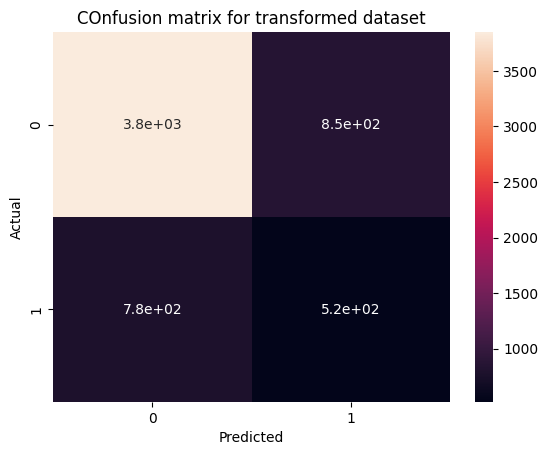

In [ ]:
# Visualizing evaluation Metric Score chart
cm= confusion_matrix(Y_test,classifier.predict(X_test1))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('COnfusion matrix for transformed dataset')
plt.show()

**Cross- Validation & Hyperparameter Tuning for Normal Dataset**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
DTR_tran=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Fit the Algorithm
grid_search_tran = GridSearchCV(estimator=DTR_tran, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

grid_search_tran.fit(X_train1, Y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

In [ ]:
#For finding the Best Parameteres
grid_search_tran.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}

In [ ]:
# Implementing the Model with the new best parameteres
DTR_best_norm=DecisionTreeClassifier(criterion = 'gini',max_depth=3,min_samples_leaf=100,random_state=42)
DTR_best_norm.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=100, random_state=42)

In [ ]:
#Calculating the training and testing accuracy
train_accuracy_DTCV = accuracy_score( Y_train , DTR_best_norm.predict(X_train1))
test_accuracy_DTCV = accuracy_score( Y_test, DTR_best_norm.predict(X_test1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_DTCV)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_DTCV)

The Train accuracy score for given Decision Tree Classifier is  0.7775416666666667
The Test accuracy score for given Decision Tree Classifier is  0.7838333333333334


In [ ]:
Model.append('Decision Tree Classifier CV')
train_sc.append(train_accuracy_DTCV)
test_sc.append(test_accuracy_DTCV)

#### **The model implementation of Decision tree classifier for BALANCED Dataset.**

In [ ]:
# ML Model - 1 Implementation
classifier_trans=DecisionTreeClassifier()
# Fit the Algorithm
classifier_trans.fit(X_train_trans1,Y_train_trans)
# Predict on the model

DecisionTreeClassifier()

In [ ]:
#Calculating the training and testing accuracy
train_accuracy_DTB = accuracy_score(Y_train_trans , classifier_trans.predict(X_train_trans1))
test_accuracy_DTB = accuracy_score(Y_test_trans , classifier_trans.predict(X_test_trans1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_DTB)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_DTB)

The Train accuracy score for given Decision Tree Classifier is  0.9995719865175753
The Test accuracy score for given Decision Tree Classifier is  0.7948855125187246


In [ ]:
# Following piece of code for proper formatting

Model.append('Decision Tree Classifier Bal')
train_sc.append(train_accuracy_DTB)
test_sc.append(test_accuracy_DTB)

**Cross- Validation & Hyperparameter Tuning for Balanced dataset.**

In [ ]:
DTR_CV=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Fit the Algorithm
grid_search_tran = GridSearchCV(estimator=DTR_CV, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=3, scoring = "accuracy")

grid_search_tran.fit(X_train_trans1,Y_train_trans)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=3)

In [ ]:
#FInding the best Parameteres
grid_search_tran.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 50}

In [ ]:
#Implemeting the Model with new best parameteres
DTR_best_tran=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)
DTR_best_tran.fit(X_train_trans1,Y_train_trans)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [ ]:
#Calculating the training and esting accuracy
train_accuracy_DCV = accuracy_score(Y_train_trans , DTR_best_tran.predict(X_train_trans1))
test_accuracy_DCV = accuracy_score(Y_test_trans , DTR_best_tran.predict(X_test_trans1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_DCV)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_DCV)

The Train accuracy score for given Decision Tree Classifier is  0.8306136643304264
The Test accuracy score for given Decision Tree Classifier is  0.8001283971752622


In [ ]:
# Following piece of code for proper formatting

Model.append('Decision Tree Classifier CV BAL')
train_sc.append(train_accuracy_DCV)
test_sc.append(test_accuracy_DCV)

**I have used gridsearch cross validation for tuning the hyper parameters. We can see Normal Dataset is showing 99% accuracy for training whereas for testing it shows only 73% accuracy. This might be the situation for overfitting due to class imbalance. But after Cross validation the training and testing accuracy are nearly coinciding on each other which are the signs of optimal fit.**

**In the following result Dataframe we can see even the balanced dataframe is also similar trends of overfitting. But after the cross validation it shows optimal fit with better overlapping of the train and test accuaracy.**

In [ ]:
result = { 'Model':Model,'Train_accu':train_sc,'Test_accu':test_sc}

In [ ]:
pd.DataFrame(result)

,Model,Train_accu,Test_accu
0,Decision Tree Classifier,0.994917,0.728500
1,Decision Tree Classifier CV,0.777542,0.783833
2,Decision Tree Classifier Bal,0.999572,0.794886
3,Decision Tree Classifier CV BAL,0.830614,0.800128


### ML Model - 2

#### **Model Implementation for Normal Dataset which is imbalanced.**

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train1,Y_train)

RandomForestClassifier()

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_RN = accuracy_score(Y_train , RFC.predict(X_train1))
test_accuracy_RN = accuracy_score(Y_test , RFC.predict(X_test1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_RN)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_RN)

The Train accuracy score for given Decision Tree Classifier is  0.9948333333333333
The Test accuracy score for given Decision Tree Classifier is  0.8205


In [ ]:
# Following piece of code for proper formatting

Model.append('Random Fores Classifier Nor')
train_sc.append(train_accuracy_RN)
test_sc.append(test_accuracy_RN)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

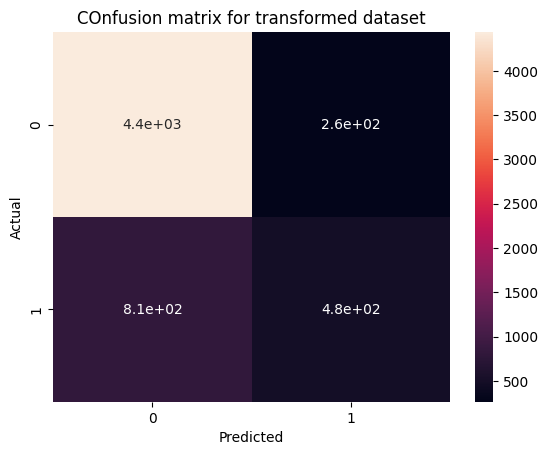

In [ ]:
# Visualizing evaluation Metric Score chart
cm= confusion_matrix(Y_test,RFC.predict(X_test1))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('COnfusion matrix for transformed dataset')
plt.show()

 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf = RandomForestClassifier(random_state = 1)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
                                  

# Fit the Algorithm
CV_rfc = GridSearchCV(estimator=rf,verbose=5, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train1, Y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.814 total time=   2.4s
[CV 2/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.812 total time=   2.5s
[CV 3/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.814 total time=   3.3s
[CV 1/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.814 total time=   8.1s
[CV 2/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.811 total time=   7.4s
[CV 3/3] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.813 total time=   5.7s
[CV 1/3] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.814 total time=   2.3s
[CV 2/3] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200;, score=0.812 total time=   3.3s
[CV 3/3] END criterion=gini, max_depth=4, max_feat

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=5)

In [ ]:
# Finding the best parameteres
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
# Implementing the New Model with the new best parameteres
rf_best = RandomForestClassifier(criterion='gini',max_features ='auto', max_depth=7,n_estimators=500,random_state = 1)
rf_best.fit(X_train1, Y_train)

RandomForestClassifier(max_depth=7, max_features='auto', n_estimators=500,
                       random_state=1)

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_RCV = accuracy_score(Y_train , rf_best.predict(X_train1))
test_accuracy_RCV = accuracy_score(Y_test , rf_best.predict(X_test1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_RCV)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_RCV)

The Train accuracy score for given Decision Tree Classifier is  0.828125
The Test accuracy score for given Decision Tree Classifier is  0.829


In [ ]:
# Following piece of code for proper formatting

Model.append('Random Fores Classifier NorCV')
train_sc.append(train_accuracy_RCV)
test_sc.append(test_accuracy_RCV)

#### **Model Implementation for balanced dataset.**

In [ ]:
RFC_trans = RandomForestClassifier()
RFC_trans.fit(X_train_trans1,Y_train_trans)

RandomForestClassifier()

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_RT = accuracy_score(Y_train_trans , RFC_trans.predict(X_train_trans1))
test_accuracy_RT = accuracy_score(Y_test_trans , RFC_trans.predict(X_test_trans1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_RT)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_RT)

The Train accuracy score for given Decision Tree Classifier is  0.9995452356749238
The Test accuracy score for given Decision Tree Classifier is  0.8690348812326129


In [ ]:
# Following piece of code for proper formatting

Model.append('Random Fores Classifier Tran')
train_sc.append(train_accuracy_RT)
test_sc.append(test_accuracy_RT)

**Cross Validation and hyperparameter tuning for the balanced dataset**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_tran = RandomForestClassifier(random_state = 1)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
                                  

# Fit the Algorithm
CV_rfc_tran = GridSearchCV(estimator=rf_tran,verbose=5, param_grid=param_grid, cv= 5)
CV_rfc_tran.fit(X_train_trans1,Y_train_trans)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.754 total time=   8.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.756 total time=   8.6s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.758 total time=   6.6s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.756 total time=   6.4s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.757 total time=   8.5s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.756 total time=  17.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.760 total time=  20.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.762 total time=  19.0s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=5)

In [ ]:
# Best Parameteres for the given cross validation.
CV_rfc_tran.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [ ]:
# Implementing the New Model with the new best parameteres
rf_tran_best= RandomForestClassifier()
rf_tran_best.fit(X_train_trans1,Y_train_trans)

RandomForestClassifier()

In [ ]:
# Calculating the training and testing accuracy for model with new parameteres
train_accuracy_RTC = accuracy_score(Y_train_trans , rf_tran_best.predict(X_train_trans1))
test_accuracy_RTC = accuracy_score(Y_test_trans , rf_tran_best.predict(X_test_trans1))

print('The Train accuracy score for given Decision Tree Classifier is ',train_accuracy_RTC)
print('The Test accuracy score for given Decision Tree Classifier is ',test_accuracy_RTC)

In [ ]:
# Following piece of code for proper formatting

Model.append('Random Fores Classifier TranCV')
train_sc.append(train_accuracy_RTC)
test_sc.append(test_accuracy_RTC)

**Random Forest have improved a significant amount of accuracy.But still there is a lack of convergence over train and test accuracy. It still shows the sign of overfitting and again we can improve the accuracy of the model.**

In [ ]:
result = { 'Model':Model,'Train_accu':train_sc,'Test_accu':test_sc}

In [ ]:
pd.DataFrame(result)

,Model,Train_accu,Test_accu
0,Decision Tree Classifier,0.994917,0.728500
1,Decision Tree Classifier CV,0.777542,0.783833
2,Decision Tree Classifier Bal,0.999572,0.794886
3,Decision Tree Classifier CV BAL,0.830614,0.800128
4,Random Fores Classifier Nor,0.994833,0.820500
5,Random Fores Classifier NorCV,0.828125,0.829000
6,Random Fores Classifier Tran,0.999545,0.869035
7,Random Fores Classifier TranCV,0.999518,0.868714


### ML Model - 3

**The Implementation of Machine Learning Model for Normal Dataset.**

In [ ]:
# ML Model - 3 Implementation
XGBC= XGBClassifier()
# Fit the Algorithm
XGBC.fit(X_train1,Y_train)
# Predict on the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_XN = accuracy_score(Y_train , XGBC.predict(X_train1))
test_accuracy_XN = accuracy_score(Y_test , XGBC.predict(X_test1))

print('The Train accuracy score for given Extreme Gradient Boost Classifier is ',train_accuracy_XN)
print('The Test accuracy score for given  Extreme Gradient Boost Classifier is ',test_accuracy_XN)

In [ ]:
# Following piece of code for proper formatting

Model.append('Extreme Gradient Boost Classifier Nor')
train_sc.append(train_accuracy_XN)
test_sc.append(test_accuracy_XN)

1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

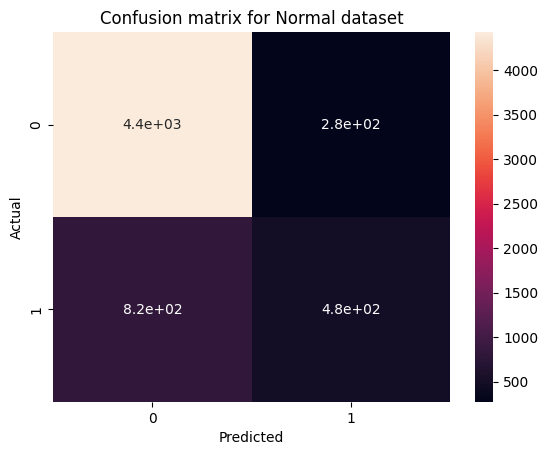

In [ ]:
# Visualizing evaluation Metric Score chart
cm= confusion_matrix(Y_test,XGBC.predict(X_test1))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Normal dataset')
plt.show()


2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGB_cv= XGBClassifier()

# Fit the Algorithm
params = {'max_depth': [10,15,25],
          'n_estimators': [50,None,150],
          'criterion':['gini','entropy'],
          'max_leaf_nodes' :[100,150,200]}

# Applying the Gridsearch Cross Validation
XGB_CV_Norm= GridSearchCV(XGB_cv , param_grid = params ,verbose = 5 , cv = 3, return_train_score= True)
XGB_CV_Norm.fit(X_train,Y_train)


# Predict on the model

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[04:31:29] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 1/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.948, test=0.804) total time=  12.9s
[04:31:42] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 2/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.953, test=0.804) total time=   6.4s
[04:31:48] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 3/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.948, test=0.803) total time=   4.8s
[CV 1/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=None;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=None;, score=(train=n

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 25],
                         'max_leaf_nodes': [100, 150, 200],
                         'n_estimators': [50, None, 150]},
             return_train_score=True, verbose=5)

In [ ]:
# Finding the best parameteres
XGB_CV_Norm.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 100,
 'n_estimators': 50}

In [ ]:
# Implementing the New Model with the new best parameteres
XGB_best_norm=XGBClassifier(criterion='gini',max_depth=10,max_leaf_nodes=100,n_estimators=50)
XGB_best_norm.fit(X_train,Y_train)

[05:16:27] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaf_nodes=100,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Calculating the training and testing accuracy for model with new best Parameteres
train_accuracy_NCV = accuracy_score(Y_train , XGB_best_norm.predict(X_train))
test_accuracy_NCV = accuracy_score(Y_test , XGB_best_norm.predict(X_test))

print('The Train accuracy score for given Extreme Gradient Boost Classifier is ',train_accuracy_NCV)
print('The Test accuracy score for given  Extreme Gradient Boost Classifier is ',test_accuracy_NCV)

The Train accuracy score for given Extreme Gradient Boost Classifier is  0.9289166666666666
The Test accuracy score for given  Extreme Gradient Boost Classifier is  0.8166666666666667


In [ ]:
# Following piece of code for proper formatting

Model.append('Extreme Gradient Boost Classifier NORCV')
train_sc.append(train_accuracy_NCV)
test_sc.append(test_accuracy_NCV)

#### **Model Implementation for transformed datset**

In [ ]:
# ML Model - 3 Implementation
XGBC_tran= XGBClassifier()
# Fit the Algorithm
XGBC_tran.fit(X_train_trans1,Y_train_trans)
# Predict on the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_Xtran = accuracy_score(Y_train_trans , XGBC_tran.predict(X_train_trans1))
test_accuracy_Xtran = accuracy_score(Y_test_trans , XGBC_tran.predict(X_test_trans1))

print('The Train accuracy score for given Extreme Gradient Boost Classifier is ',train_accuracy_Xtran)
print('The Test accuracy score for given  Extreme Gradient Boost Classifier is ',test_accuracy_Xtran)

The Train accuracy score for given Extreme Gradient Boost Classifier is  0.9162431116580172
The Test accuracy score for given  Extreme Gradient Boost Classifier is  0.876524716456238


In [ ]:
# Following piece of code for proper formatting

Model.append('Extreme Gradient Boost Classifier Tran')
train_sc.append(train_accuracy_Xtran)
test_sc.append(test_accuracy_Xtran)

**Cross validation for Transformed Dataset**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
XGB_tran_cv= XGBClassifier()

# Fit the Algorithm
params = {'max_depth': [10,15,25],
          'n_estimators': [50,None,150],
          'criterion':['gini','entropy'],
          'max_leaf_nodes' :[100,150,200]}

# Applying the Gridsearch Cross Validation
XGB_CV_Tran= GridSearchCV(XGB_tran_cv , param_grid = params ,verbose = 5 , cv = 3, return_train_score= True)
XGB_CV_Tran.fit(X_train_trans1,Y_train_trans)


# Predict on the model

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[05:19:08] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 1/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.972, test=0.869) total time=  15.4s
[05:19:23] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 2/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.972, test=0.872) total time=  13.3s
[05:19:36] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.

[CV 3/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=50;, score=(train=0.975, test=0.871) total time=  14.8s
[CV 1/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=None;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_leaf_nodes=100, n_estimators=None;, score=(train=n

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 25],
                         'max_leaf_nodes': [100, 150, 200],
                         'n_estimators': [50, None, 150]},
             return_train_score=True, verbose=5)

In [ ]:
# Finding the best parameteres
XGB_CV_Tran.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 100,
 'n_estimators': 150}

In [ ]:
# Implementing the New Model with the new best parameteres
XGB_best_tran= XGBClassifier(criterion='gini',max_depth=10,max_leaf_nodes=100,n_estimators=150)
XGB_best_tran.fit(X_train_trans1,Y_train_trans)

[06:34:29] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaf_nodes=100,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# Calculating the training and testing accuracy for model
train_accuracy_XTC = accuracy_score(Y_train_trans , XGB_best_tran.predict(X_train_trans1))
test_accuracy_XTC = accuracy_score(Y_test_trans , XGB_best_tran.predict(X_test_trans1))

print('The Train accuracy score for given Extreme Gradient Boost Classifier is ',train_accuracy_XTC)
print('The Test accuracy score for given  Extreme Gradient Boost Classifier is ',test_accuracy_XTC)

The Train accuracy score for given Extreme Gradient Boost Classifier is  0.9956931143331015
The Test accuracy score for given  Extreme Gradient Boost Classifier is  0.8762037235180826


In [ ]:
# Following piece of code for proper formatting

Model.append('Extreme Gradient Boost Classifier TranCV')
train_sc.append(train_accuracy_XTC)
test_sc.append(test_accuracy_XTC)

**From the above Model implementation we have inferred that XGBoost is a very powerful algorithm which is improving the acuracy in four folds.While implementing the model for transformed datset we have observed 91% training accuracy and 87% testing accuracy. The convergence in both the accuracies makes the model more accuracte and reliable.**

In [ ]:
result = { 'Model':Model,'Train_accu':train_sc,'Test_accu':test_sc}

In [ ]:
pd.DataFrame(result)

,Model,Train_accu,Test_accu
0,Decision Tree Classifier,0.994917,0.728500
1,Decision Tree Classifier CV,0.777542,0.783833
2,Decision Tree Classifier Bal,0.999572,0.794886
3,Decision Tree Classifier CV BAL,0.830614,0.800128
4,Random Fores Classifier Nor,0.994833,0.820500
5,Random Fores Classifier NorCV,0.828125,0.829000
6,Random Fores Classifier Tran,0.999545,0.869035
7,Random Fores Classifier TranCV,0.999518,0.868714
8,Extreme Gradient Boost Classifier Nor,0.872875,0.817833
9,Extreme Gradient Boost Classifier NORCV,0.928917,0.816667


**As we know credit card default prediction is very important task for the banks and its correctness is very crucial in order to improve the business profitability. what happens when a applicant is healthy and our model is classiffying it as unhealthy. Such error might hamper the accuracy and opportunities of growth would shrink.In such senerio we require to build a model which is more correct and robust in order to classify the unhealthy applicants to predict the future defaults.**

**In such case XGBoost is helping us to predict the defaulters with 87% accuracy. So in future if a Bank or any Financial institue, requires to provide the credit card to customers they could very easily predict the probability of default and may acheive success in their business model.**

### Feature Importances

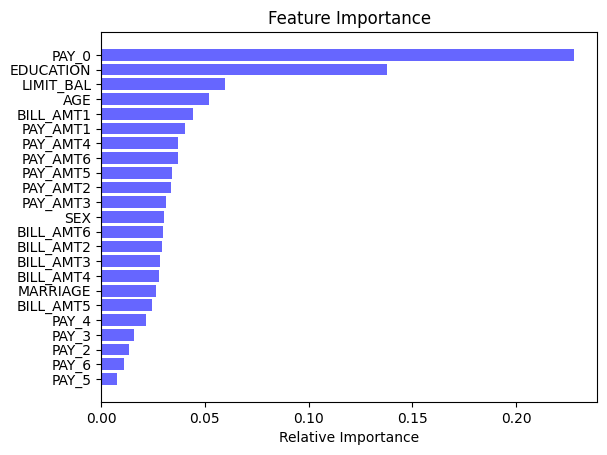

In [185]:
# Plotting the featue importances for the first Model

features = independent_variable # as usual independent_variable to assign the names
importances = classifier_trans.feature_importances_ # first model 
indices = np.argsort(importances)
     

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center',alpha=0.6)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**So from the Plot it is clear that Payment Status in the Month of September is most important feature , followed by education, balance limit and age of the credit card holder.**

**So from the graph we can notice one weird thing. All the features are positively contributing(Classiffying Default) without having any negative contribution. From this I am assuming the features can move the values  only  towards defaults,but still we have some payments which have been defualted. So it means we should be more focused towards individual datapoints and the behaviour of features whiledeciding the fate of datapoints.Hence we are using SHAP for understanding the detailed behaviour of all features while dealing with classification.**

In [158]:
resu1=pd.DataFrame(X_test_trans1,columns=independent_variable)

In [191]:

# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Defining a tree explainer for the built model
explainer = shap.TreeExplainer(classifier_trans)
# obtaining shap values for the first row of the test data
shap_values = explainer.shap_values(resu1.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], resu1.iloc[0])

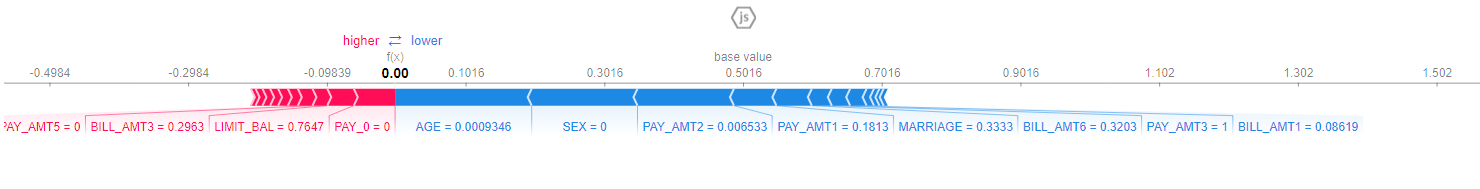

**This is the copy of actual shap output.**

**Now SHAP plot is making the picture more clear and clean. We can see Payment status in the month of November is most important feature but it is positively contributing(Towards Default). Whereas AGE, SEX and payment status at july are negatively contributing(Towards Non Default). So SHAP is providing more detailed explanations over feature contributions. It helps to deeply understand the core involvement of features towards Classification.**

# **Conclusion**

**1. According to our Hypothesis Testing, the rate of default for males and females has no significant difference. Both the groups have same Statistical Probability for making Defaults.**\
**2. The Age group with 27 and 29 shows maximum defaults, so Banks can be cautious while dealing with such age groups.**\

**3. For Contributing in the anti-fraudster financial environment, our decision tress classification model was well trained and showing the 77% accuracy on testing dataset. Indeed the model requires more improvement and hence we moved to the next model.**\
**4. Random Forest Classifier shows a little improvement with 86% of testing accuracy, where as its training accuracy is 99%. It is still shows fractional overfitting.**\
**5.Finally the extreme gradient boost classifier comes with maximum training and testing accuracy with a parallel relationship. Its training accuracy is 92% and testing accuracy is 87 %.**
**6. The cross validation for XGBClassifier was unable to provide help. Because its accuaracy for training is 99% and for testing it is 86%.**
**7.Hence for the final applications Banks can go with XGBClassifier without tuning.**

